In [1]:
import numpy as np 
import pandas as pd 
from datetime import datetime
from dateutil.relativedelta import relativedelta
import fix_yahoo_finance as yf

import matplotlib.pyplot as plt
import matplotlib
import scipy.optimize as sco
import fix_yahoo_finance

# Dow Jones Industrial Average Tickers

# DJIA = ['JNJ','UTX','IBM','CVX','PG','KO','MCD','MSFT','DIS','VZ','NKE','AAPL','INTC', '^GSPC']
SETH = ['BIV','BLV','BND','VCIT','VFIAX','VYM','VO','VB','VWO','VSS','VGTSX','VNQ','PARWX']
DJIA = ['JNJ','IBM','CVX','PG','KO','MCD','MSFT','DIS','BA','NKE','AAPL','INTC','^GSPC']

# Dates
start = datetime.today() - relativedelta(years=5)
end = datetime.today()
# Grab data, change to weekly returns and write to CSV
print(start,end)

2014-02-24 12:36:00.162258 2019-02-24 12:36:00.162258


In [3]:
def getdata(listofstocks, startdate, enddate):
    for i in range(2):
        try:
            x = yf.download(listofstocks, startdate, enddate)['Adj Close']
            break
        except Exception as error:
            print("Could not pull the data see below error /n{}".format(error))
    df = pd.DataFrame(x)
    df = df.resample('W-FRI').last().sort_index(ascending=False) #changing data to weekly
    for row in range(len(df)-1):
        df.iloc[row] = df.iloc[row].div(df.iloc[row+1]) #return
    df = df.iloc[:-1]
    df = np.log(df)  #taking log return
    df.to_csv('StockData.csv', encoding='utf-8') #write to CSV
    return(df)

data = getdata(DJIA, start, end)
print((data).head(1))
# print(data[['AAPL']])


[*********************100%***********************]  13 of 13 downloaded
                AAPL        BA       CVX       DIS     IBM      INTC  \
Date                                                                   
2019-02-22  0.014852  0.014442  0.000335  0.023351  0.0088  0.015939   

                 JNJ        KO       MCD      MSFT       NKE        PG  \
Date                                                                     
2019-02-22  0.001612  0.000884  0.017624  0.029355 -0.007288  0.017814   

               ^GSPC  
Date                  
2019-02-22  0.006131  


In [4]:
mult = 52.1429 #number of weeks per year
numberofstocks = len(data.columns)-1
# data = pd.read_csv('SethFundData.csv', index_col=False)

def split_data(dataframe, numberofstocks):
# 	numberofstocks = numberofstocks + 1
	temp1 = data.iloc[:,0:(numberofstocks)]
	temp2 = data[['^GSPC']]
	temp2.columns = ['S&P']
	df = pd.concat([temp1,temp2],axis = 1) # select number of columns
	sample_df = df.iloc[0:int(len(df.index)/5),:-1]
	trn_df = df.iloc[int(len(df.index)/5):len(df.index),:-1]
	trn_df_graph = df.iloc[int(len(df.index)/5):len(df.index),:]  
	sample_bench = df.iloc[0:int(len(df.index)/5),-1]   
	return(trn_df,sample_df,trn_df_graph, sample_bench)


trn_df = split_data(data,numberofstocks)[0]
trn_df_graph = split_data(data,numberofstocks)[2] 
#print((trn_df_graph).head(5))


In [5]:
trn_df.mean().sort_values(ascending=False) * mult
# print(temp.sort_values(ascending=False))

BA      0.284148
MSFT    0.250302
AAPL    0.239571
INTC    0.194230
MCD     0.166059
NKE     0.157361
JNJ     0.116010
DIS     0.084787
KO      0.067580
PG      0.039196
CVX     0.034829
IBM    -0.005357
dtype: float64

In [6]:
trn_df.std().sort_values(ascending=False) * np.sqrt(mult)

AAPL    0.235842
INTC    0.233098
BA      0.221646
CVX     0.211505
MSFT    0.210880
NKE     0.210167
IBM     0.190496
DIS     0.184572
MCD     0.147772
KO      0.140685
JNJ     0.136692
PG      0.133299
dtype: float64

In [7]:
trn_df.cov() * mult

,AAPL,BA,CVX,DIS,IBM,INTC,JNJ,KO,MCD,MSFT,NKE,PG
AAPL,0.055621,0.017310,0.012574,0.015857,0.010824,0.023192,0.009075,0.009792,0.008124,0.022175,0.017146,0.010648
BA,0.017310,0.049127,0.017424,0.017676,0.017215,0.012707,0.009666,0.010408,0.008709,0.012289,0.012986,0.007158
CVX,0.012574,0.017424,0.044734,0.015349,0.015099,0.018992,0.012582,0.011807,0.010359,0.016295,0.007629,0.010025
DIS,0.015857,0.017676,0.015349,0.034067,0.011926,0.016573,0.009579,0.007305,0.006288,0.016828,0.016782,0.008187
IBM,0.010824,0.017215,0.015099,0.011926,0.036289,0.012959,0.010023,0.010985,0.006366,0.013357,0.008164,0.005988
INTC,0.023192,0.012707,0.018992,0.016573,0.012959,0.054335,0.011545,0.012728,0.009510,0.028316,0.016267,0.010619
JNJ,0.009075,0.009666,0.012582,0.009579,0.010023,0.011545,0.018685,0.008020,0.008974,0.013129,0.009217,0.008671
KO,0.009792,0.010408,0.011807,0.007305,0.010985,0.012728,0.008020,0.019792,0.010423,0.014494,0.008896,0.009785
MCD,0.008124,0.008709,0.010359,0.006288,0.006366,0.009510,0.008974,0.010423,0.021837,0.012814,0.007178,0.005551
MSFT,0.022175,0.012289,0.016295,0.016828,0.013357,0.028316,0.013129,0.014494,0.012814,0.044470,0.016159,0.011350


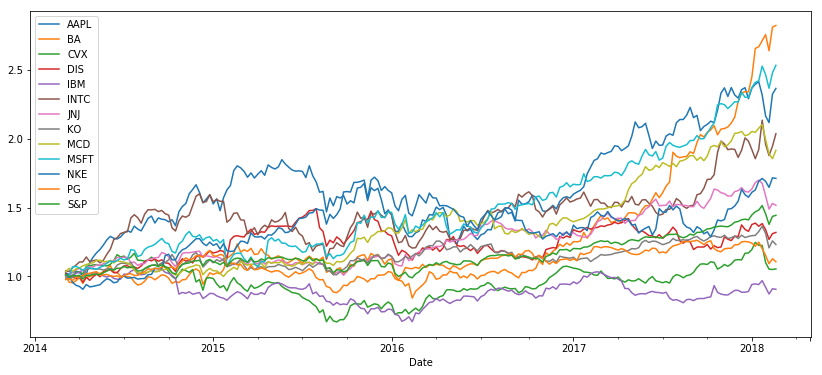

                AAPL        BA       CVX       DIS       IBM      INTC  \
Date                                                                     
2014-03-07  1.025737  1.001587  1.001826  1.024028  1.009172  1.041446   
2014-03-14  1.014558  0.958357  0.993258  0.997019  0.979322  1.035512   
2014-03-21  1.030252  0.954222  1.006488  1.000499  1.003005  1.063449   
2014-03-28  1.037939  0.968746  1.031165  0.983420  1.023113  1.082294   
2014-04-04  1.028148  0.991211  1.033772  1.001186  1.030179  1.104869   
2014-04-11  1.004268  0.949005  1.018254  0.957682  1.048390  1.105713   
2014-04-18  1.014517  0.993429  1.074530  0.994042  1.020191  1.141451   
2014-04-25  1.101512  0.999159  1.077220  0.971926  1.018149  1.108041   
2014-05-02  1.140563  1.009050  1.083544  0.997431  1.027821  1.114352   
2014-05-09  1.172162  1.023665  1.086234  1.017594  1.026460  1.119235   
2014-05-16  1.195882  1.021397  1.079274  0.998036  1.010021  1.098619   
2014-05-23  1.228692  1.033815  1.0809

In [8]:
def graph_ret(dataframe, location):
    trn_ret_df = dataframe.sort_index(ascending=True)
    trn_ret_df.iloc[:,:] = trn_ret_df.iloc[:,:].add(1)
    for row in range(0,len(trn_ret_df.index), +1):
        trn_ret_df.iloc[row,:] = (trn_ret_df.iloc[row,:]).mul(trn_ret_df.iloc[row-1,:])
    trn_ret_df.plot(figsize=(14,6))
    plt.savefig(location)
    plt.show()
    plt.close()
    return(trn_ret_df)

dataframe = trn_df_graph
location = "./return.png"
print(graph_ret(dataframe, location))



In [9]:
def basic_ret(dataframe):# annualized mean return
	noc=len(dataframe.columns)
	np.random.seed(0)
	weights = np.random.random(noc) # initial random weights
	weights /= np.sum(weights) #take weight devide by sum of eights and save 
	exp_ret = np.dot(dataframe.mean(), weights) * mult #annualized expected return with initial weights
	exp_var = np.dot(weights.T, np.dot(dataframe.cov() * mult, weights))
	exp_vol = np.sqrt(exp_var)
	return(exp_vol, exp_ret)

basic_ret(trn_df)

(0.11743298425772848, 0.13872475846364482)

In [10]:
def simulation(dataframe, steps):
	noc=len(dataframe.columns)    
	prets = []
	pvols = []
	for i in range(steps):
		np.random.seed(i)
		weights = np.random.random(noc)
		weights /= np.sum(weights)
		exp_ret = np.dot(dataframe.mean(), weights) * mult
		prets.append(exp_ret)
		exp_var = np.dot(weights.T, np.dot(dataframe.cov() * mult, weights))
		pvols.append(np.sqrt(exp_var))
	prets = np.array(prets)
	pvols = np.array(pvols)
	return(pvols, prets)

simulation(trn_df,10000)


(array([0.11743298, 0.12009821, 0.11842326, ..., 0.12339362, 0.12848556,
        0.12054553]),
 array([0.13872476, 0.16136352, 0.11193984, ..., 0.12359677, 0.14967363,
        0.14615329]))

Expected Max Sharp = 1.4992724527089274
Expected Sharp = 1.1813099985536226


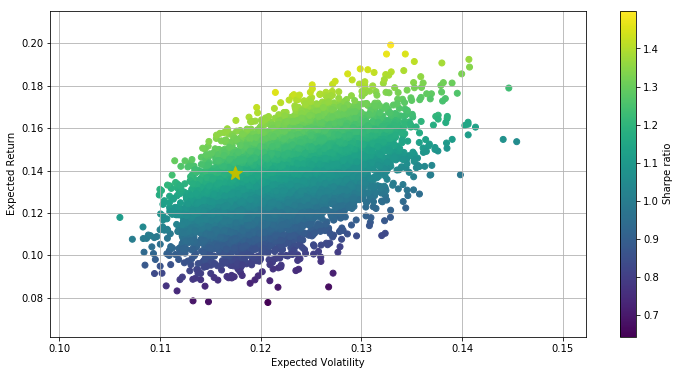

In [11]:
pvols, prets = simulation(trn_df,10000)[0:2]
print("Expected Max Sharp = {}".format(max(prets/pvols)))
exp_vol, exp_ret = basic_ret(trn_df)[0:2]
print("Expected Sharp = {}".format(exp_ret / exp_vol))
plt.figure(figsize=(12,6))
plt.scatter(pvols, prets, c= prets / pvols, marker ="o")
plt.plot(exp_vol, exp_ret, 'y*', markersize=15.0)
plt.grid(True)
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe ratio")
plt.savefig("./scatterplot.png")
plt.show()
plt.close()


In [12]:
def statistics(weights):
	weights = np.array(weights)
	pret = np.dot(trn_df.mean(), weights) * mult
	pvol = np.sqrt(np.dot(weights.T, np.dot(trn_df.cov() * mult, weights)))
	return(np.array([pret,pvol, pret / pvol]))


In [13]:
#define constraints
noc=len(trn_df.columns) # total number for index of columns
base_weights = noc * [1/noc,]
cons = ({'type':'eq', 'fun':lambda x: np.sum(x) - 1}) #defining constraints 
bnds = tuple((0, .25) for x in range(noc))
stocknames = np.array(trn_df.columns)
print(cons)
print(bnds)
print(stocknames)


{'type': 'eq', 'fun': <function <lambda> at 0x000001C89D1CCD08>}
((0, 0.25), (0, 0.25), (0, 0.25), (0, 0.25), (0, 0.25), (0, 0.25), (0, 0.25), (0, 0.25), (0, 0.25), (0, 0.25), (0, 0.25), (0, 0.25))
['AAPL' 'BA' 'CVX' 'DIS' 'IBM' 'INTC' 'JNJ' 'KO' 'MCD' 'MSFT' 'NKE' 'PG']


In [14]:
def max_sharpe(weights):
	return(-statistics(weights)[2])

In [15]:
opts = sco.minimize(max_sharpe, base_weights, method='SLSQP', bounds=bnds, constraints=cons)
max_sharp_weights = np.column_stack((stocknames, opts['x'].T.round(3)))
max_sharp_weights = np.flipud(max_sharp_weights[max_sharp_weights[:,1].argsort()])
print("Max Sharp weights")
print(pd.DataFrame(max_sharp_weights).to_string(index=False, header=False))
statoutnames = np.array(['return','volatility', 'sharp'])
pd.DataFrame(np.column_stack((statoutnames, statistics(opts['x']).T.round(4))).T)


Max Sharp weights
MCD   0.25
  BA   0.25
MSFT  0.241
AAPL  0.139
 JNJ  0.069
 NKE  0.051
  PG      0
  KO      0
INTC      0
 IBM      0
 DIS      0
 CVX      0


,0,1,2
0,return,volatility,sharp
1,0.2222,0.1346,1.65


0.18996267971269457 0.12360226134769806


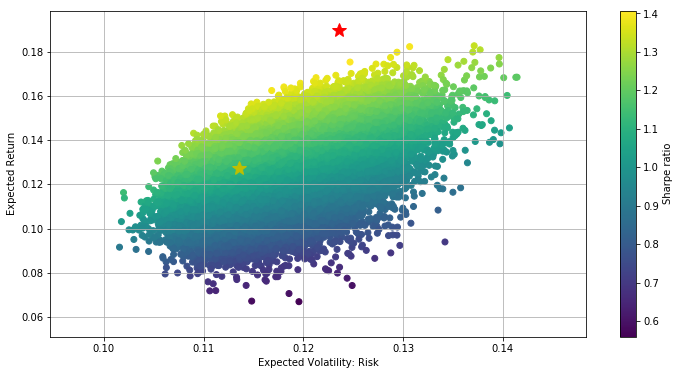

In [48]:
# prets, pvols = simulation(trn_df,2500,noc)[0:2]
exp_ret_sharp, exp_vol_sharp = statistics(opts['x'])[0:2]
exp_vol, exp_ret = basic_ret(trn_df)[0:2]
print(exp_ret_sharp, exp_vol_sharp)
plt.figure(figsize=(12,6))
plt.scatter(pvols,prets, c = prets / pvols, marker ="o")
plt.plot(exp_vol_sharp,exp_ret_sharp, 'r*', markersize=15.0)
plt.plot(exp_vol, exp_ret, 'y*', markersize=15.0)
plt.grid(True)
plt.xlabel("Expected Volatility: Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe ratio")
plt.savefig("./scatterplot.png")
plt.show()
plt.close()

In [16]:
def max_ret(weights):
	return(-statistics(weights)[0])

In [17]:
optr = sco.minimize(max_ret, base_weights, method='SLSQP', bounds=bnds, constraints=cons)
max_ret_weights = np.column_stack((stocknames, optr['x'].T.round(3)))
max_ret_weights = np.flipud(max_ret_weights[max_ret_weights[:,1].argsort()])
print("Maximize return weights")
print(pd.DataFrame(max_ret_weights).to_string(index=False, header=False))
pd.DataFrame(np.column_stack((statoutnames, statistics(optr['x']).T.round(4))).T)

Maximize return weights
MSFT  0.25
INTC  0.25
  BA  0.25
AAPL  0.25
  PG     0
 NKE     0
 MCD     0
  KO     0
 JNJ     0
 IBM     0
 DIS     0
 CVX     0


,0,1,2
0,return,volatility,sharp
1,0.2421,0.165,1.4672


0.24206281688008638 0.16498707301423246


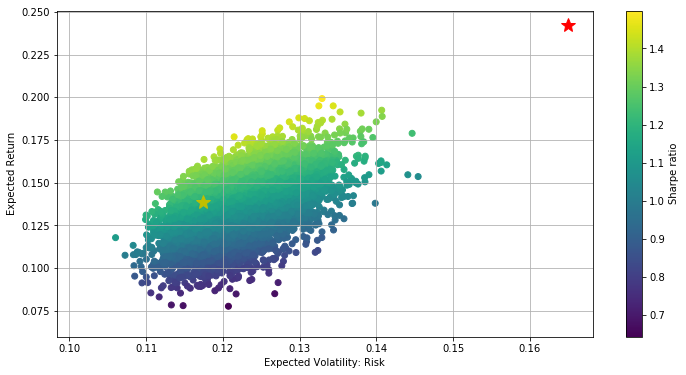

In [18]:
# prets, pvols = simulation(trn_df,2500,noc)[0:2]
exp_ret_ret, exp_vol_ret = statistics(optr['x'])[0:2]
exp_vol, exp_ret = basic_ret(trn_df)[0:2]
print(exp_ret_ret, exp_vol_ret)
plt.figure(figsize=(12,6))
plt.scatter(pvols,prets, c = prets / pvols, marker ="o")
plt.plot(exp_vol_ret,exp_ret_ret, 'r*', markersize=15.0)
plt.plot(exp_vol, exp_ret, 'y*', markersize=15.0)
plt.grid(True)
plt.xlabel("Expected Volatility: Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe ratio")
plt.savefig("./scatterplot.png")
plt.show()
plt.close()

In [19]:
def min_pvol(weights):   #New function to minimize
	return(statistics(weights)[1])

In [20]:
optv = sco.minimize(min_pvol, base_weights, method='SLSQP', bounds=bnds, constraints=cons)
min_vol_weights = np.column_stack((stocknames, optv['x'].T.round(3)))
min_vol_weights = np.flipud(min_vol_weights[min_vol_weights[:,1].argsort()])
print("Minimize risk weights")

print(pd.DataFrame(min_vol_weights).to_string(index=False, header=False))
pd.DataFrame(np.column_stack((statoutnames, statistics(optv['x']).T.round(4))).T)

Minimize risk weights
PG   0.25
 MCD  0.226
 JNJ  0.182
  KO   0.12
 IBM  0.086
 DIS  0.075
 NKE  0.049
  BA  0.008
AAPL  0.004
MSFT      0
INTC      0
 CVX      0


,0,1,2
0,return,volatility,sharp
1,0.0934,0.1026,0.9097


0.09335792754013257 0.10262892742771547


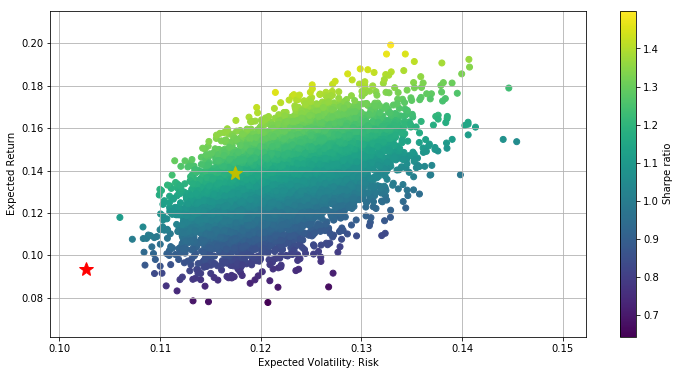

In [21]:
# prets, pvols = simulation(trn_df,2500,noc)[0:2]
exp_ret_vol, exp_vol_vol = statistics(optv['x'])[0:2]
exp_vol, exp_ret = basic_ret(trn_df)[0:2]
print(exp_ret_vol, exp_vol_vol)
plt.figure(figsize=(12,6))
plt.scatter(pvols,prets, c = prets / pvols, marker ="o")
plt.plot(exp_vol_vol,exp_ret_vol, 'r*', markersize=15.0)
plt.plot(exp_vol, exp_ret, 'y*', markersize=15.0)
plt.grid(True)
plt.xlabel("Expected Volatility: Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe ratio")
plt.savefig("./scatterplot.png")
plt.show()
plt.close()

In [22]:

trets = np.linspace(min(prets),max(prets),round(1.5*noc))
tvols = []
tweights = []
tsharpe = []

for tret in trets:
	cons = ({'type':'eq', 'fun':lambda x: statistics(x)[0] - tret},   #New constraints
			{'type':'eq', 'fun':lambda x: np.sum(x) - 1})
	res = sco.minimize(min_pvol, base_weights, method='SLSQP', bounds=bnds, constraints=cons)
	tvols.append(res['fun'])
	# temp2 = np.column_stack((res['fun'], res['x'].round(3)))
	# temp1 = np.column_stack(tret)
	
	# tweights.append(temp2)
	# # tweights.append(tret)
	# tweights.append(res['fun'])
	tweights.append(res['x'].round(3))
tvols = np.array(tvols)
tweights = np.array(tweights)
tsharpe = trets / tvols
tsharpe = np.array(tsharpe)

front_line = np.column_stack((tsharpe, trets, tvols)).round(3)
tweights = np.column_stack((front_line,tweights))
tweights = np.transpose(tweights)

dummy = ['sharpe', 'return' ,'volatility']
dummy = np.array(dummy)
dummy = np.append(dummy, stocknames)
dummy = np.column_stack((dummy,tweights))
pd.DataFrame(dummy)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,sharpe,0.75,0.825,0.896,0.966,1.033,1.097,1.159,1.217,1.273,1.325,1.373,1.418,1.46,1.497,1.532,1.562,1.589,1.612
1,return,0.078,0.085,0.092,0.099,0.106,0.113,0.121,0.128,0.135,0.142,0.149,0.156,0.164,0.171,0.178,0.185,0.192,0.199
2,volatility,0.104,0.103,0.103,0.103,0.103,0.103,0.104,0.105,0.106,0.107,0.109,0.11,0.112,0.114,0.116,0.118,0.121,0.124
3,AAPL,0,0,0.004,0.01,0.017,0.025,0.034,0.041,0.049,0.055,0.06,0.064,0.069,0.074,0.08,0.085,0.091,0.097
4,BA,0,0,0.005,0.022,0.038,0.056,0.073,0.089,0.104,0.119,0.133,0.147,0.159,0.173,0.187,0.201,0.214,0.227
5,CVX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,DIS,0.09,0.085,0.078,0.068,0.058,0.049,0.039,0.033,0.024,0.011,0,0,0,0,0,0,0,0
7,IBM,0.139,0.111,0.088,0.074,0.06,0.044,0.029,0.014,0,0,0,0,0,0,0,0,0,0
8,INTC,0,0,0,0,0,0,0,0.001,0.007,0.012,0.014,0.014,0.015,0.016,0.013,0.015,0.013,0.013
9,JNJ,0.162,0.173,0.181,0.183,0.185,0.188,0.198,0.209,0.22,0.224,0.227,0.226,0.226,0.225,0.22,0.214,0.214,0.21


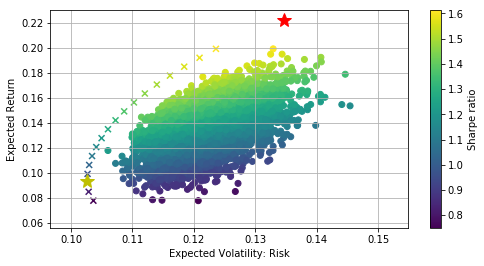

In [23]:
plt.figure(figsize=(8,4))
plt.scatter(pvols,prets, c=prets / pvols, marker ="o")
plt.scatter(tvols,trets, c=trets / tvols, marker ="x")
plt.plot(statistics(opts['x'])[1],statistics(opts['x'])[0], 'r*', markersize=15.0)
plt.plot(statistics(optv['x'])[1],statistics(optv['x'])[0], 'y*', markersize=15.0)
# plt.plot(statistics(optr['x'])[1],statistics(optr['x'])[0], 'g*', markersize=15.0)
plt.grid(True)
plt.xlabel("Expected Volatility: Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe ratio")
plt.savefig("./FrontierLine.png")
plt.show()
plt.close()


In [24]:
sample_df = split_data(data, numberofstocks)[1]
sample_df.head(10)

,AAPL,BA,CVX,DIS,IBM,INTC,JNJ,KO,MCD,MSFT,NKE,PG
Date,,,,,,,,,,,,
2019-02-22,0.014852,0.014442,0.000335,0.023351,0.008800,0.015939,0.001612,0.000884,0.017624,0.029355,-0.007288,0.017814
2019-02-15,0.000059,0.031745,0.024944,0.009639,0.031798,0.056134,0.029618,-0.089991,0.029434,0.023845,0.036012,0.007850
2019-02-08,0.027371,0.049141,-0.006696,0.001885,0.008671,0.008573,-0.013504,0.016294,-0.011210,0.027730,0.010374,0.002459
2019-02-01,0.054041,0.061832,0.044482,0.001889,0.000970,0.035296,0.045506,0.027690,-0.040369,-0.041826,0.011103,0.040514
2019-01-25,0.005976,-0.001454,-0.010106,0.000450,0.078787,-0.044692,-0.019003,-0.005054,0.007802,-0.005026,0.001987,0.023566
2019-01-18,0.029312,0.032973,0.016130,-0.014395,0.019244,0.005300,0.007219,0.005687,0.001096,0.046657,0.056376,0.004057
2019-01-11,0.026819,0.075980,0.015401,0.027357,0.034680,0.035573,0.014908,-0.004847,0.022682,0.008499,0.018449,-0.007815
2019-01-04,-0.052362,0.033261,0.019776,0.021300,0.037252,0.010003,0.004390,0.007808,0.015374,0.015224,0.017704,0.014265
2018-12-28,0.035839,0.038109,0.041724,0.029125,0.018664,0.041714,-0.006422,-0.007808,0.008064,0.021751,0.013314,0.002306


In [25]:
sample_df.mean() * mult


AAPL    0.000593
BA      0.193121
CVX     0.096860
DIS     0.087915
IBM    -0.064655
INTC    0.119801
JNJ     0.061033
KO      0.061939
MCD     0.141694
MSFT    0.182566
NKE     0.229829
PG      0.248210
dtype: float64

In [26]:
sample_df.std() * mult

AAPL    2.150088
BA      2.079737
CVX     1.563655
DIS     1.390812
IBM     1.901444
INTC    1.986293
JNJ     1.431936
KO      1.199000
MCD     1.509610
MSFT    1.600038
NKE     1.551742
PG      1.437263
dtype: float64

In [53]:
##Choose your column
xx = 3
optweights = tweights[:,xx - 1][3:]


In [28]:
def test(weights, dataframe):
	weights = np.array(weights)
	pret = np.dot(dataframe.mean(), weights) * mult
	pvol = np.sqrt(np.dot(weights.T, np.dot(dataframe.cov() * mult, weights)))
	return(np.array([pret,pvol, pret / pvol]))


In [54]:
# print(statoutnames)
# print(type(optweights))
# optweights.size
print(pd.DataFrame(dummy))
print(optweights.shape)
print(sample_df.shape)
# test(optweights,sample_df)
print(optweights)
print(sample_df)

            0      1      2      3      4      5      6      7      8      9   \
0       sharpe   0.75  0.825  0.896  0.966  1.033  1.097  1.159  1.217  1.273   
1       return  0.078  0.085  0.092  0.099  0.106  0.113  0.121  0.128  0.135   
2   volatility  0.104  0.103  0.103  0.103  0.103  0.103  0.104  0.105  0.106   
3         AAPL      0      0  0.004   0.01  0.017  0.025  0.034  0.041  0.049   
4           BA      0      0  0.005  0.022  0.038  0.056  0.073  0.089  0.104   
5          CVX      0      0      0      0      0      0      0      0      0   
6          DIS   0.09  0.085  0.078  0.068  0.058  0.049  0.039  0.033  0.024   
7          IBM  0.139  0.111  0.088  0.074   0.06  0.044  0.029  0.014      0   
8         INTC      0      0      0      0      0      0      0  0.001  0.007   
9          JNJ  0.162  0.173  0.181  0.183  0.185  0.188  0.198  0.209   0.22   
10          KO  0.174  0.148  0.123  0.108  0.093  0.081  0.078  0.077  0.074   
11         MCD  0.161  0.195

In [55]:
pd.DataFrame(np.column_stack((statoutnames, test(optweights,sample_df).T.round(4))).T)

,0,1,2
0,return,volatility,sharp
1,0.1253,0.144,0.8702


In [56]:
sample_banch = trn_df_graph = split_data(data,numberofstocks)[3]
sample_banch.mean() * mult
teststats = np.array([sample_banch.mean() * mult, sample_banch.std() * mult, ((sample_banch.mean() * mult) / (sample_banch.std() * mult))])
pd.DataFrame(np.column_stack((statoutnames, teststats.T.round(5))).T)

,0,1,2
0,return,volatility,sharp
1,0.01642,1.23209,0.01333


In [57]:
def max_test(weights,dataframe):
	return(test(weights,dataframe)[1])

test_cons = ({'type':'eq', 'fun':lambda x: np.sum(x) - 1}) #defining constraints 



In [58]:
opt_test = sco.minimize(max_test, base_weights,args=(sample_df), method='SLSQP', bounds=bnds, constraints=test_cons)
min_vol_test = np.column_stack((stocknames, opt_test['x'].T.round(3)))
min_vol_test = np.flipud(min_vol_test[min_vol_test[:,1].argsort()])
print("Minimize risk weights")
print(min_vol_test)
# pd.DataFrame(np.column_stack((statoutnames, test(opt_test['x'],).T.round(4))).T)

Minimize risk weights
[['KO' 0.25]
 ['NKE' 0.227]
 ['MCD' 0.187]
 ['JNJ' 0.121]
 ['DIS' 0.118]
 ['INTC' 0.066]
 ['PG' 0.022]
 ['AAPL' 0.009]
 ['MSFT' 0.0]
 ['IBM' 0.0]
 ['CVX' 0.0]
 ['BA' 0.0]]
